In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

df = pd.read_csv("./titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# 간단한 EDA
display(df.dtypes)

df.isnull().sum()

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# 결측값 처리
# 나이: 중앙값
df['Age'] = df['Age'].fillna(df['Age'].median())

# Embarked : 최빈값
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df['Embarked'] = df['Embarked'].fillna('S')

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
df['Cabin'].unique()
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
df = df.drop(labels='Cabin', axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

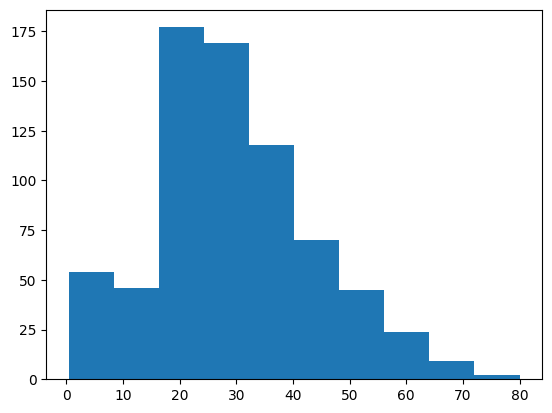

In [3]:
import matplotlib.pyplot as plt

plt.hist(df['Age'])
plt.show

In [ ]:
# Fare 의 IQR 구하기
df2 = df['Fare']

Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)

IQR = Q3 - Q1

print("IQR : ", IQR)

Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

IQR :  23.0896


(-26.724, 65.6344)

In [ ]:
# Fare 이상치 데이터 구하기
outlier1 = df[df2 < Q1 - 1.5 * IQR]
outlier2 = df[df2 > Q3 + 1.5 * IQR]

len(outlier1), len(outlier2)

(0, 116)

In [ ]:
# Fare 이상치 데이터에서 여성의 수
print(sum(outlier2['Sex']=="female"))

70


# [상관계수]
두 변수가 어떤 선형적 관계에 있는지를 분석하는 방법이다. 두 변수 간 관계의 강도를 상관관계라고 한다.

## 1. 수치형 - 수치형

### 1) Pearson Correlation(피어슨 상관계수)
피어슨 상관계수는 두 변수의 결합은 정규분포일 것이라는 가정이 포함되어 있으며 구조적으로 볼 때 이상치(outlier)에 매우 민감한 편이다.

주의사항: 결과를 보고 상관관계가 인과관계와 관련이 있을 것이라는 확대해석을 하지 말아야하며 단순하게 두 변수가 연관성이 있다로만 결론을 내려야 한다.

<ipython-input-92-0f46b00ccf1a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_pearson = df.corr(method = 'pearson')


<Axes: >

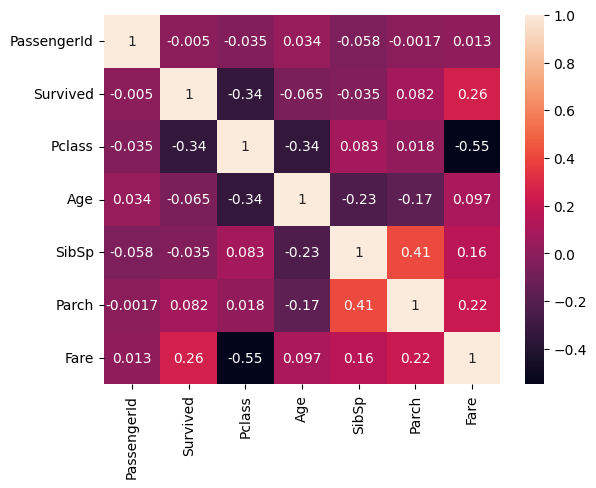

In [ ]:
import seaborn as sns

df_pearson = df.corr(method = 'pearson')
sns.heatmap(df_pearson, annot = True)

### 2) Spearman Correlation(스피어만 상관계수)
스피어만 상관계수는 비모수적 상관계수로, 상관 계수를 계산할 때 두 데이터의 실제 값 대신 두 값의 순위를 사용해 상관 계수를 계산하는 방식이다.

연속형 데이터에 적합한 피어슨 상관계수와 달리 discrete 데이터, ordinal(순서형) 데이터가 포함된 관계를 평가하기 위해 사용한다.

스피어만 상관계수는 데이터 내 편차와 에러에 민감하여 일반적으로 켄달 상관계수보다 높은 값을 가진다.

ex) 직원들이 테스트 연습을 완료하는 순서가 고용된 개월 수와 관련이 있는지 여부를 평가



<ipython-input-94-5a8cda50fa53>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_spearman = df.corr(method = 'spearman')


<Axes: >

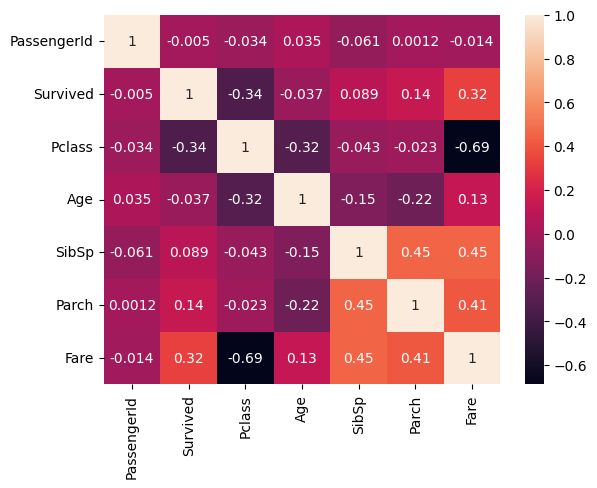

In [ ]:
df_spearman = df.corr(method = 'spearman')
sns.heatmap(df_spearman, annot = True)

### 3) Kendall Correlation(켄달 상관계수)
켄달 상관계수는 비모수적 상관계수로, 두 변수들 간의 순의를 비교하여 연관성을 계산한다. 켄달 상관계수는 샘플 사이즈가 작거나 데이터의 동률이 많을 때 유용하다.


<ipython-input-97-e81ea0b8d633>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_kendall = df.corr(method='kendall')


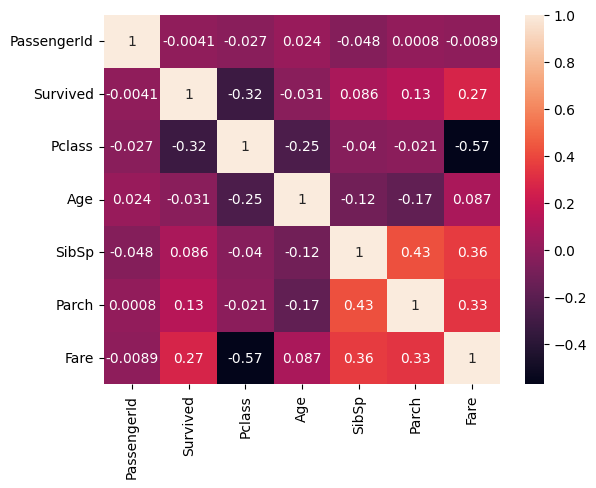

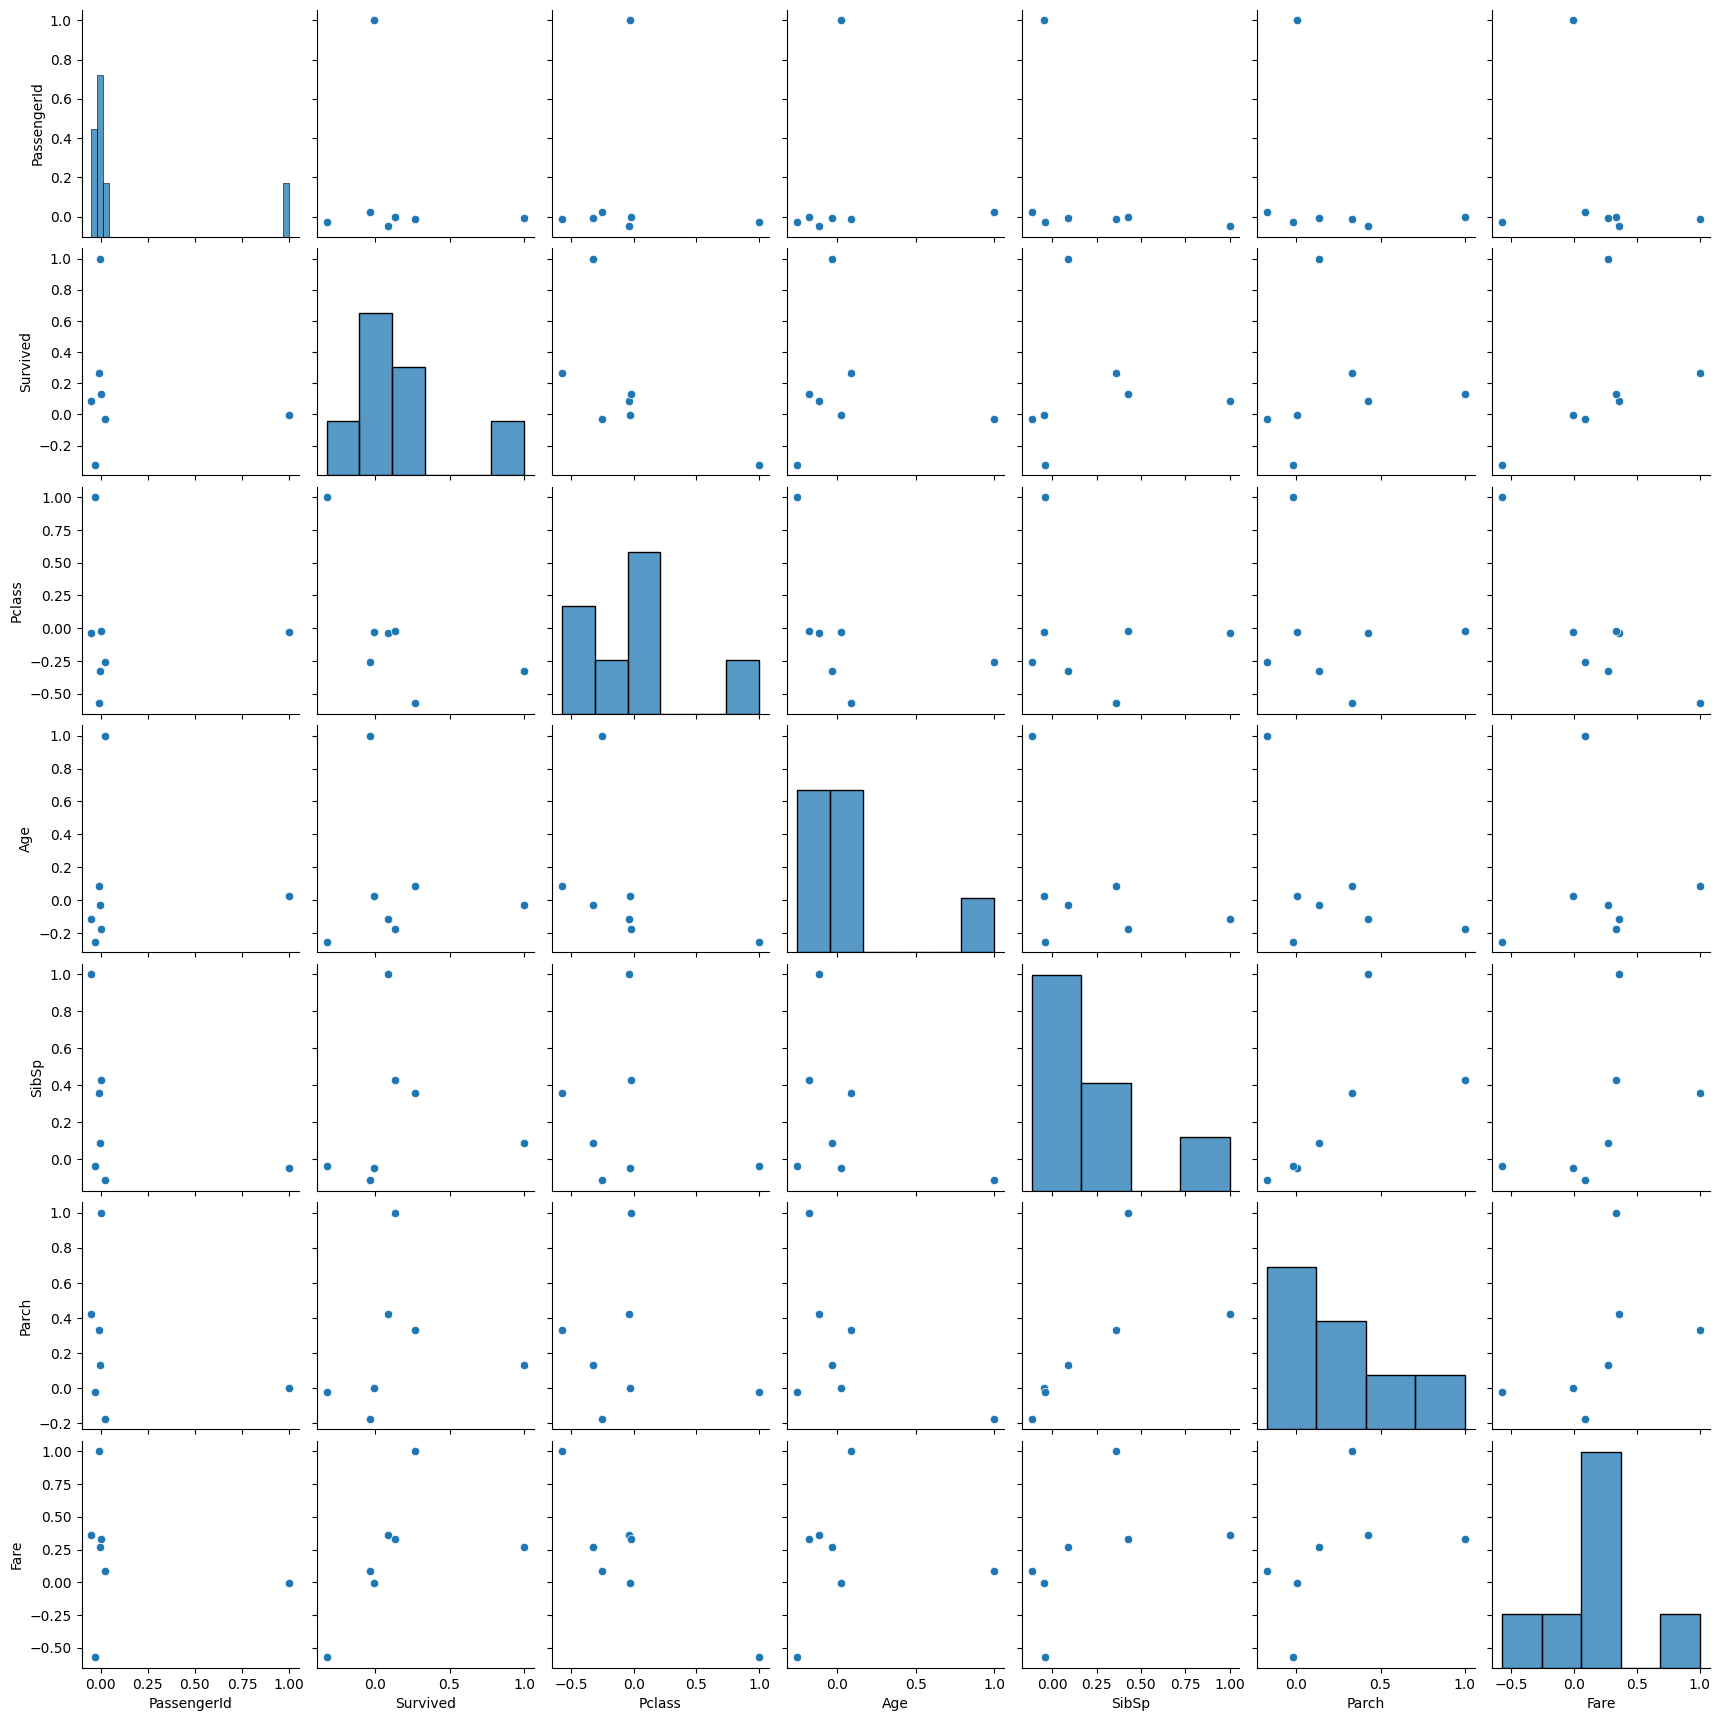

In [ ]:
df_kendall = df.corr(method='kendall')
sns.heatmap(df_kendall, annot = True)

## 2. 범주형 - 수치형

### 1) Point biserial correlation(점이연 상관계수)

하나가 연속변수이고 다른 하나가 이분변수일 때 사용하는 상관계수이다. 이분변수를 0과 1로 변환한 후에 pearson 상관계수를 계산하면 점이연 상관계수를 구할 수 있다.

검사에서 총점과 문항(correct/incorrect 혹은 yes/no) 간의 상관계수를 구할 때 자주 사용되며, 두 집단의 T-검증과 밀접한 관련이 있다.


In [ ]:
# 나이, Fare와 생존여부 간의 상관계수
df['Survived'].unique()

array([0, 1])

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

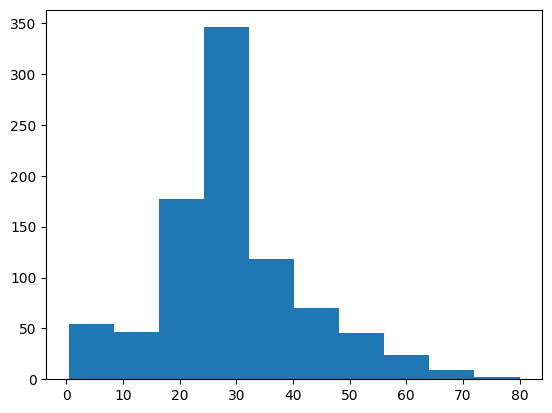

In [ ]:
plt.hist(df['Age'])

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

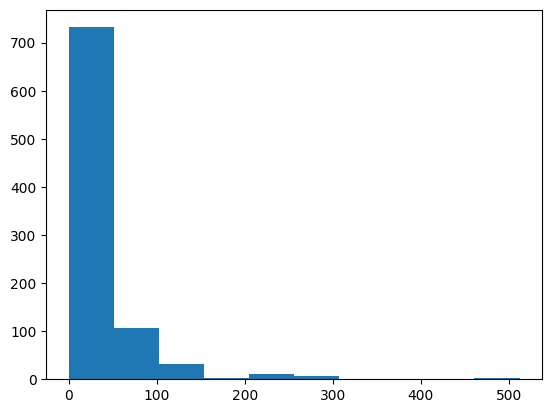

In [ ]:
plt.hist(df['Fare'])

In [ ]:
#Point biserial correlation

from scipy import stats

# x: 이분변수 / y: 연속변수
pointbiserialcorr1 = stats.pointbiserialr(df['Survived'],df['Age'])
pointbiserialcorr2 = stats.pointbiserialr(df['Survived'],df['Fare'])

pointbiserialcorr1, pointbiserialcorr2


(SignificanceResult(statistic=-0.06491041993052585, pvalue=0.05276068847585567),
 SignificanceResult(statistic=0.2573065223849624, pvalue=6.120189341924608e-15))

### 2) Biserial correlation(이연 상관계수)

하나가 연속변수이고 다른 하나가 이분변수일 때 사용하는 상관계수이다. 이분 변수가 원래 연속 변수인데 이분화한 경우에 사용한다.

이분화되지 않았을 때 두 연속변수들간의 상관계수를 추정하는 방식으로 상관계수를 구한다.

<function matplotlib.pyplot.show(close=None, block=None)>

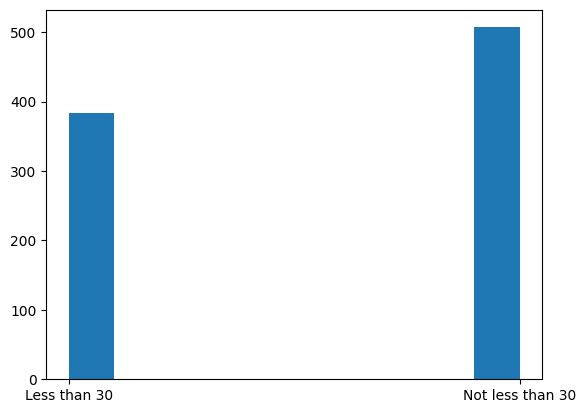

In [19]:
# 연속변수인 Age를 이분화 예시
def age_groups(age):
  if age < 30:
    return "Less than 30" #30 미만
  else:
    return "Not less than 30" #30 이상

df['Age_group'] = df['Age'].apply(age_groups)

plt.hist(df['Age_group'])
plt.show

### 3) Polyserial correlation

X변수가 연속형이고 Y변수의 범주화가 3개 이상인 경우에 사용한다.

## 3. 범주형 - 범주형
1) Phi coefficient(파이 계수)

X, Y변수 모두 남/여 또는 있다/없다 등 이분변수일 때 두 변수간의 상관분석을 하는 방법이다.

파이 계수의 상관계수 값은 0 ~ 1 사이의 범위를 갖는다.
0에 가까울수록 상관관계가 낮고, 1에 가까울수록 상관관계가 높다고 해석된다.

머신러닝에서는 MCC(Matthews Correlation Coefficient)라고 부른다.

In [37]:
from sklearn.metrics import matthews_corrcoef

Sex = df['Sex'].replace(to_replace=['female', 'male'],value=[0,1])
Survived = df['Survived'].values

y_true = Sex
y_pred = Survived

matthews_corrcoef(y_true, y_pred)

-0.5433513806577551

2) Cramer's V coefficient(크래머 V계수)

파이 상관계수와 유사한데, 둘 중 하나의 변수라도 값이 3개 이상이라면 Cramer's V를 사용한다.

파이 계수의 상관계수 값은 0 ~ 1 사이의 범위를 갖는다. 0에 가까울수록 상관관계가 낮고, 1에 가까울수록 상관관계가 높다고 해석된다.


In [39]:
df['Pclass'].unique()

array([3, 1, 2])

In [40]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return np.sqrt(stat/(obs*mini))

cramers_V(df['Pclass'],df['Survived'])

0.33981738800531175